# Sheet 2 - Practical Exercise

In these exercises we will work with data randomly generated by ourselves. Importing an external dataset will not be necessary.

In [55]:
#add code to import your preferred visualization package

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
import plotly.express as px

## Exercise 1
Use Numpy to create two sets of 1000 Datapoints. Both should be following a normal distribution, one around an expected value of 5 with a standard deviation of 1.5, the other around an expected value of 12 with a standard deviation of 3.  

Plot both sets in one histogram.

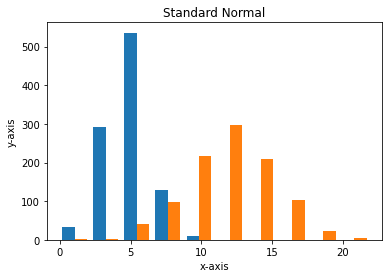

In [60]:
#Add code to create both datasets

import plotly.express as px
ds1 = np.random.normal(5, 1.5, size=1000)
ds2 = np.random.normal(12, 3, size=1000)

#Add code to plot both in a histogram

plt.hist([ds1, ds2])

plt.title("Standard Normal")
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()


Create a third set of Datapoints containing the points of both of the previous sets. Plot this Dataset as a histogram as well.

In [71]:
#Add code to combine the two existing datasets
df = pd.DataFrame(dict(
    series = np.concatenate((["ds1"]*len(ds1), ["ds2"]*len(ds2))), #it will take the total length after merging ds1 + ds2 and ["ds1"]*len(ds1) => here ["ds1"] is the label name 
    data  =np.concatenate((ds1,ds2)) #this the total data after merging ds1 + ds2
))


#Add code to plot the result as a histogramm
px.histogram(df, x="data", color="series", barmode="overlay")

You should see a histogram with two "humps". However the second hump should be significantly smaller than it was when plotting the datasets separately. Why is that the case?

## Exercise 2
Create a function that calculates the mean and standard deviation of datasets and uses those values to calculate the `SelfExp` for each value of the given dataset. Use this function to calculate the `SelfExp` for each value of each of the three datasets.  
Next create a scatterplot with the selfexp value as the y-axis, and the actual randomly generated value on the x-axis

In [74]:
def selfExp(values):
    #Add code for calculating mean and standard deviation
    mean = np.mean(values)
    std = np.std(values)
    #Add code for calculating the selfexp values
    selfExp = lambda x : abs(x - mean)/std
    s = selfExp(values)
    return s #Add your output here

In [75]:
#Add code to create a scatterplot
ds3 = np.concatenate((ds1, ds2));

scatter_mean_5 = px.scatter(x=ds1,y = selfExp(ds1) )
scatter_mean_5.show()

scatter_mean_12 = px.scatter(x=ds2,y = selfExp(ds2) )
scatter_mean_12.show()

scatter_all = px.scatter(x=ds3,y = selfExp(ds3))
scatter_all.show()

The resulting plot does not necessarily grant us new insight into the properties of our dataset. It should however give us a nice visualization and hopefully some understanding of what the selfexp actually is.

Now consider a threshold value $\tau = 2.5$, representing a probability of $99\%$ (compare slide 32 of the lecture).
For each of our three datasets, create a new dataset only containing the values with a SelfExp $s>\tau$.

In [78]:
#Add code to filter the datasets
std_mean_5 = np.std(ds1)
filter_mean_5 = np.extract(ds1 > 2.5*std_mean_5, ds1)

std_mean_12 = np.std(ds2)
filter_mean_122 = np.extract(ds2 > 2.5*std_mean_12, ds2)

std_all = np.std(ds3)
filter_all = np.extract(ds3 > 2.5*std_all, ds3)